In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding
from tensorflow.keras.optimizers import Adam
import numpy as np

In [4]:
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(total_words)
print(tokenizer.word_index)

263
{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'gra

In [5]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

In [8]:
tokenizer.texts_to_sequences([corpus[0]])[0]

[4, 2, 66, 8, 67, 68, 69, 70]

In [6]:
input_sequences

[[4, 2],
 [4, 2, 66],
 [4, 2, 66, 8],
 [4, 2, 66, 8, 67],
 [4, 2, 66, 8, 67, 68],
 [4, 2, 66, 8, 67, 68, 69],
 [4, 2, 66, 8, 67, 68, 69, 70],
 [71, 40],
 [71, 40, 20],
 [71, 40, 20, 21],
 [71, 40, 20, 21, 72],
 [71, 40, 20, 21, 72, 3],
 [71, 40, 20, 21, 72, 3, 73],
 [16, 74],
 [16, 74, 75],
 [16, 74, 75, 1],
 [16, 74, 75, 1, 76],
 [16, 74, 75, 1, 76, 33],
 [16, 74, 75, 1, 76, 33, 3],
 [16, 74, 75, 1, 76, 33, 3, 77],
 [16, 74, 75, 1, 76, 33, 3, 77, 22],
 [41, 33],
 [41, 33, 3],
 [41, 33, 3, 78],
 [41, 33, 3, 78, 1],
 [41, 33, 3, 78, 1, 79],
 [41, 33, 3, 78, 1, 79, 80],
 [41, 33, 3, 78, 1, 79, 80, 8],
 [41, 33, 3, 78, 1, 79, 80, 8, 81],
 [21, 82],
 [21, 82, 3],
 [21, 82, 3, 83],
 [21, 82, 3, 83, 84],
 [21, 82, 3, 83, 84, 7],
 [21, 82, 3, 83, 84, 7, 42],
 [21, 82, 3, 83, 84, 7, 42, 1],
 [21, 82, 3, 83, 84, 7, 42, 1, 43],
 [85, 86],
 [85, 86, 87],
 [85, 86, 87, 33],
 [85, 86, 87, 33, 44],
 [85, 86, 87, 33, 44, 88],
 [85, 86, 87, 33, 44, 88, 13],
 [85, 86, 87, 33, 44, 88, 13, 2],
 [85, 86, 

In [9]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])  # get max of length of sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
xs

array([[  0,   0,   0, ...,   0,   0,   4],
       [  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       ...,
       [  0,   0,   0, ...,  61,  60, 262],
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9]])

In [11]:
ys

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [13]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [14]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 3s 8ms/step - loss: 5.5694 - accuracy: 0.0287
Epoch 2/500
15/15 [==============================] - 0s 8ms/step - loss: 5.5455 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 8ms/step - loss: 5.4899 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 5.3299 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 5.1289 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0696 - accuracy: 0.0442
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0295 - accuracy: 0.0486
Epoch 8/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0002 - accuracy: 0.0574
Epoch 9/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9717 - accuracy: 0.0530
Epoch 10/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9365 - accuracy: 0.0486
Epoch 11/

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

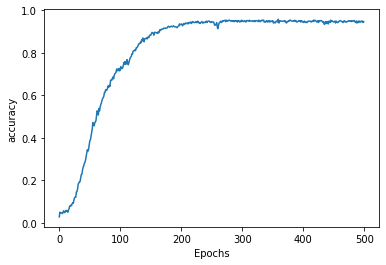

In [19]:
plot_graphs(history, 'accuracy')

In [23]:
seed_text = "Laurence went to dublin"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Laurence went to dublin the of old as lanigan lanigan mchugh hadnt i might strangled strangled hall hall hall hall mchugh hadnt entangled entangled gave a eyes swore water swore entangled a call meelia strangled hall hall hall hall hall glisten hadnt entangled entangled gave a eyes swore water swore entangled a call meelia strangled hall hall hall hall hall glisten hadnt entangled entangled gave a eyes swore water swore entangled a call meelia strangled hall hall hall hall hall glisten hadnt entangled entangled gave a eyes swore water swore entangled a call meelia strangled hall hall hall hall hall glisten hadnt entangled entangled


# Laurences_generated_poetry.txt

In [24]:
!gdown --id 15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT


C:\Users\Andrew\anaconda3\envs\TF_Developer_Certificate\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT
To: C:\Users\Andrew\Documents\Project\TF-Developer-Certificate\TensorFlow in Practice - Course\Natural language processing with TensorFlow\irish-lyrics-eof.txt

  0%|          | 0.00/69.0k [00:00<?, ?B/s]
100%|##########| 69.0k/69.0k [00:00<00:00, 1.60MB/s]


In [25]:
tokenizer = Tokenizer()

data = open('./irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [26]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

In [27]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [28]:
model = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_len - 1),
    Bidirectional(LSTM(150)),
    Dense(total_words, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)
print(model)


Epoch 1/100
377/377 [==============================] - 6s 11ms/step - loss: 6.7679 - accuracy: 0.0650
Epoch 2/100
377/377 [==============================] - 4s 10ms/step - loss: 6.2338 - accuracy: 0.0761
Epoch 3/100
377/377 [==============================] - 4s 10ms/step - loss: 5.9534 - accuracy: 0.0852
Epoch 4/100
377/377 [==============================] - 4s 10ms/step - loss: 5.6388 - accuracy: 0.0991
Epoch 5/100
377/377 [==============================] - 4s 10ms/step - loss: 5.2889 - accuracy: 0.1180
Epoch 6/100
377/377 [==============================] - 4s 10ms/step - loss: 4.9178 - accuracy: 0.1376
Epoch 7/100
377/377 [==============================] - 4s 10ms/step - loss: 4.5468 - accuracy: 0.1619
Epoch 8/100
377/377 [==============================] - 4s 10ms/step - loss: 4.1712 - accuracy: 0.1890
Epoch 9/100
377/377 [==============================] - 4s 10ms/step - loss: 3.8201 - accuracy: 0.2283
Epoch 10/100
377/377 [==============================] - 4s 10ms/step - loss: 3.486

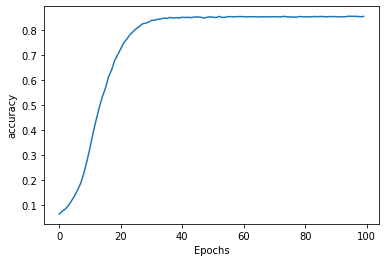

In [29]:
plot_graphs(history, 'accuracy')

In [31]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this saint are break the lake of doneen father above devils were my naught but again said said by your own mary died for by meet a cursed english spleen there inside on treated seems delirium able to fever dont know in irish lilt of irish laughter bonny bonny irish lass caught gem sent gem venture trial turned journey buy ned prisoner blight the neatest face turning grey rings their holly bush up and moaning ye havent an arm homes as youre near fray caught slower moving their tie slip delirium shapes and know dear the lassies and boo down by
